# Training Workflow - L1 Model

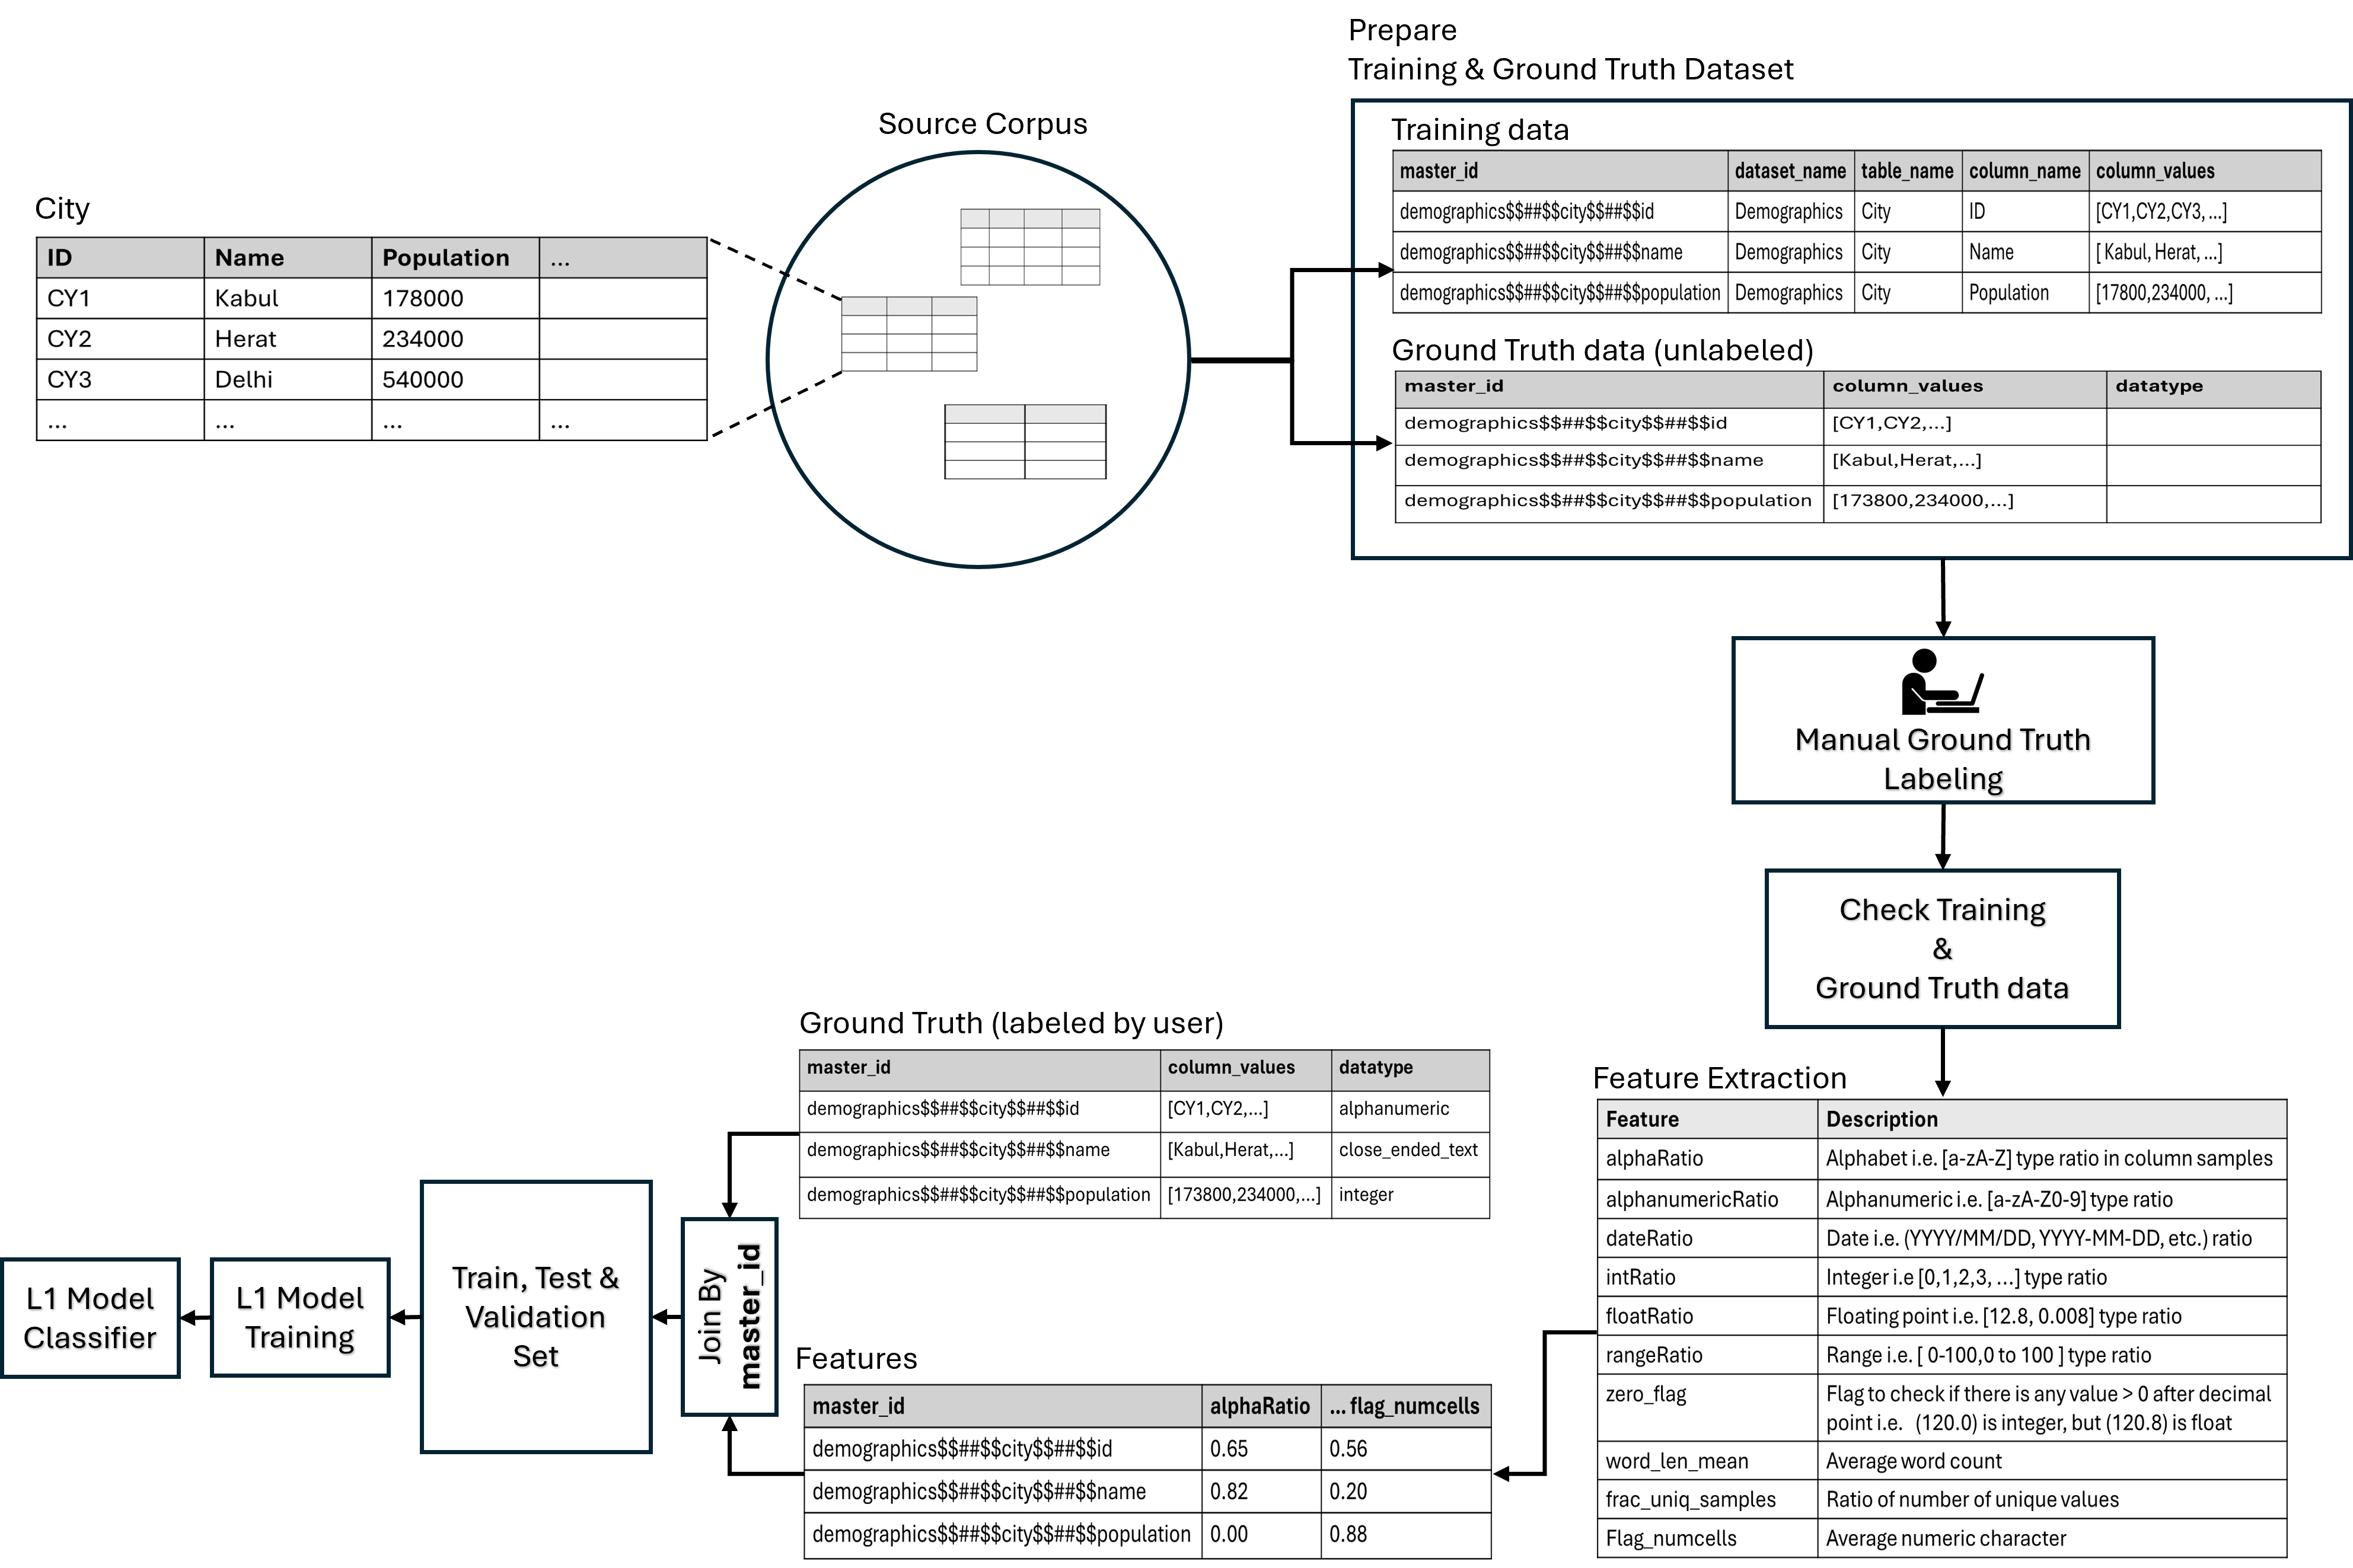

In [1]:
# DONOT RUN THIS , this is for only showing image
from IPython import display 
display.Image("documentation/DI_Training_Workflow.png")

In [1]:
# import necessary component
from legoai import DataTypeIdentificationPipeline

> [!NOTE]  
> The Training Dataset & Ground Truth sample can be obtained here [sample training](https://github.com/LEGOAI-TECHNOLOGIES/legoai_community_accelerator/tree/main/example_dataset/training/)

# Training & Ground Truth data preparation

> [!NOTE]   
> The Ground Truth file obtained after below cell is executed must be annotated/labelled

### Provide directory path where all the training data is located & output directory path to save the training & gt files

In [2]:
# training data directory path
INPUT_PATH = r"example_dataset/training/raw_data/"
# final output directory path to store prepared training and ground truth labels.
OUTPUT_PATH = r"DI_TRAINING_RESOURCE/"
DataTypeIdentificationPipeline.prepare_dataset(
    input_path = INPUT_PATH, 
    output_path = OUTPUT_PATH
)

[*] Training file created at:  DI_TRAINING_RESOURCE\training_l1_22042024.json 
[*] Ground truth file created at:  DI_TRAINING_RESOURCE\ground_truth_l1_22042024.xlsx  ... annotate/label the ground truth before proceeding further


# Check The Training File & Ground Truth File

In [3]:
# full path to the training file, obtained from running above cell
TRAINING_FILE_PATH = r"DI_TRAINING_RESOURCE/training_l1_22042024.json"
# full path to the ground truth file
# there is already the correspoinding ground truth in the path below , you can use that for this notebook
GROUND_TRUTH_FILE_PATH = r"example_dataset/training/ground_truth/di_l1_ground_truth.csv"

# or you can manually fill the ground truth in the file created above and the provide that path here
# GROUND_TRUTH_FILE_PATH = r"DI_TRAINING_RESOURCE/ground_truth_l1_22042024.xlsx" 

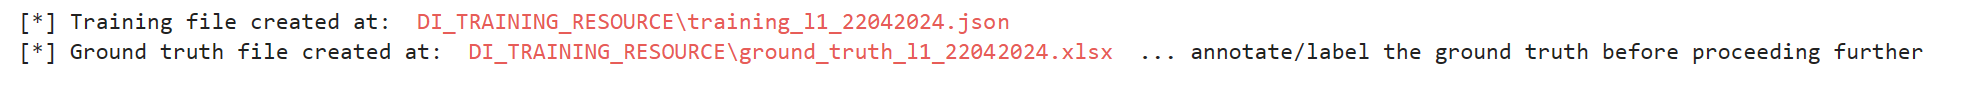

In [13]:
#  Training path and Ground truth path after prepare_dataset() is called, DONOT RUN THIS CELL
from IPython import display
display.Image("documentation/training_data_preparation.png")

> [!IMPORTANT]  
> The **TRAINING_FILE_PATH** & **GROUND_TRUTH_PATH** is prinited from executing prepare_dataset() method.  
> Replace the **TRAINING_FILE_PATH** with the obtained path, label your ground truth data with appropriate datatypes then add it to the path **GROUND_TRUTH_FILE_PATH**.

In [4]:
DataTypeIdentificationPipeline.check_dataset(
    training_path = TRAINING_FILE_PATH,
    gt_path = GROUND_TRUTH_FILE_PATH
)   

[*] Checking Training data:
[✓] Required columns present in DI_TRAINING_RESOURCE\training_l1_22042024.json
[✓] No empty or Null master_id present in DI_TRAINING_RESOURCE\training_l1_22042024.json
[✓] No null values present in DI_TRAINING_RESOURCE\training_l1_22042024.json

[*] Checking Ground truth data:
[✓] Required columns present in example_dataset\training\ground_truth\di_l1_ground_truth.csv
[✓] No empty or Null master_id present in example_dataset\training\ground_truth\di_l1_ground_truth.csv
[✓] No null values present in example_dataset\training\ground_truth\di_l1_ground_truth.csv
[✓] Ground truth labels checked for null , empty values & allowed data types
[✓] Every training data present in ground truth



# Execute L1 Model Training 

In [5]:
OUTPUT_PATH = r"di_training_result/" # final output directory to save training output
TRAINING_SIZE = 0.7 # ratio of data to use for training
VALIDATION_SIZE = 0.25 # ratio of data to use for validation & rest used for testing
# Run the training pipeline, the final output will be classification report & confusion matrix of both Test & Validation set
test_class_report , test_confusion_matrix, validation_class_report, validation_confusion_matrix = DataTypeIdentificationPipeline.training_pipeline(
    input_path = TRAINING_FILE_PATH,  
    gt_path = GROUND_TRUTH_FILE_PATH,
    output_path = OUTPUT_PATH,
    training_size = TRAINING_SIZE,
    validation_size = VALIDATION_SIZE,
)

[*] Extracting files meta information ...


  0%|                                                                                                                                                      | 0/1 [00:00<?, ?it/s]


[*] Meta Data Row Count training_l1_22042024.json:  (348, 7)
[*] Feature Extraction Started... 2024-04-22 14:39:21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.09it/s]

[*] Feature Creation Finished. Processed 348 rows in 0:00:00.294303
[*] Meta information saved at:
 di_training_result\intermediate\datatype_l1_identification\training_l1_22042024_feats.csv
[*] Combining all features into single file ...
[*] Consolidated features saved at:
 di_training_result\analytical_data\datatype_l1_identification\di_l1_consolidated_feats_data.csv
[*] Features: (348, 23) , Labels: (348, 3)
[*] Final Merged Features and Labels: (348, 24)
[*] Dataset Distribution Train:  (243, 25) Validation:  (87, 25) Test:  (18, 25)

[*] Encoder saved at:
 di_training_result\model\model_objects\datatype_l1_identification\di_l1_classifier_encoder_22042024.pkl

[*] Model building started at 2024-04-22 14:39:22



D:\Lego AI\legoai_community_accelerator\venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



[*] Classifier model saved at:
 di_training_result\model\model_objects\datatype_l1_identification\di_l1_classifier_22042024.pkl


[*] Test predictions saved at:
 di_training_result\model\model_results\datatype_l1_identification\di_l1_classifier_test_predicted_22042024.csv


[*] Classification report for test data saved at:
 di_training_result\model\model_metrics\datatype_l1_identification\di_l1_classifier_test_predicted_classification_report_22042024.csv


[*] Confusion matrix for test data saved at:
 di_training_result\model\model_metrics\datatype_l1_identification\di_l1_classifier_test_predicted_confusion_matrix_22042024.csv


[*] Validations predictions saved at:
 di_training_result\model\model_results\datatype_l1_identification\di_l1_classifier_validation_predicted_22042024.csv


[*] Classification report for validation data saved at:
 di_training_result\model\model_metrics\datatype_l1_identification\di_l1_classifier_validation_predicted_classification_report_22042024.csv


[*] Co

In [6]:
# Test set Classification Report
test_class_report

,precision,recall,f1-score,support
alphanumeric,1.000000,0.750000,0.857143,4.000000
close_ended_text,0.750000,1.000000,0.857143,3.000000
float,1.000000,0.500000,0.666667,2.000000
integer,0.875000,1.000000,0.933333,7.000000
open_ended_text,1.000000,1.000000,1.000000,2.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.925000,0.850000,0.862857,18.000000
weighted avg,0.909722,0.888889,0.881481,18.000000


In [7]:
# Test set Confustion Matrix
test_confusion_matrix

,alphanumeric,close_ended_text,float,integer,open_ended_text
alphanumeric,3,1,0,0,0
close_ended_text,0,3,0,0,0
float,0,0,1,1,0
integer,0,0,0,7,0
open_ended_text,0,0,0,0,2


In [8]:
# Validation set Classification report
validation_class_report

,precision,recall,f1-score,support
alphanumeric,1.000000,0.666667,0.800000,6.000000
close_ended_text,0.833333,0.909091,0.869565,22.000000
date & time,1.000000,1.000000,1.000000,3.000000
float,1.000000,0.857143,0.923077,7.000000
integer,0.951220,1.000000,0.975000,39.000000
open_ended_text,0.777778,0.700000,0.736842,10.000000
accuracy,0.908046,0.908046,0.908046,0.908046
macro avg,0.927055,0.855483,0.884081,87.000000
weighted avg,0.910445,0.908046,0.905579,87.000000


In [9]:
# Validation set Confusion Matrix
validation_confusion_matrix

,alphanumeric,close_ended_text,date & time,float,integer,open_ended_text
alphanumeric,4,1,0,0,1,0
close_ended_text,0,20,0,0,0,2
date & time,0,0,3,0,0,0
float,0,0,0,6,1,0
integer,0,0,0,0,39,0
open_ended_text,0,3,0,0,0,7


### Use the trained model for inferencing

In [10]:
INPUT_PATH = "D:/Lego AI/data_directory/ecommerce_data"
OUTPUT_PATH = "di_opensource_inference/"
# Model Version obtained after training look at output above of training pipeline, & Training path is the output path of the training pipeline.
TRAINING_PATH = "di_training_result/"
MODEL_VERSION = "22042024"

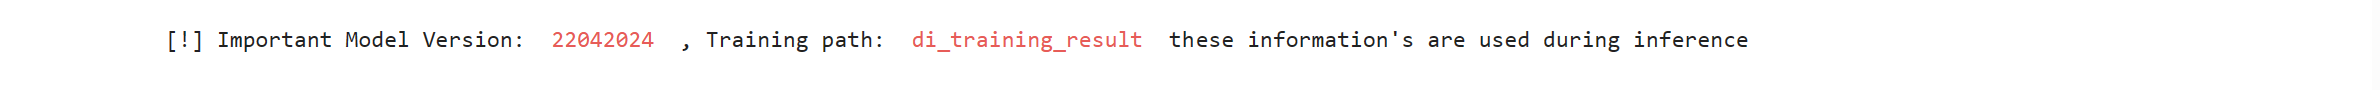

In [12]:
#  Model version & Training path, DONOT RUN THIS CELL
from IPython import display
display.Image("documentation/post_training_info.png")

>[!IMPORTANT]  
> - A sample image of **MODEL_VERSION** and your **TRAINING_PATH** is shown above, when you run this notebook this information is printed at the end of L1 model training.
> - Above model version is just for sample change the **MODEL_VERSION** from your corresponding training

In [11]:
DataTypeIdentificationPipeline.prediction_pipeline(
    input_path = INPUT_PATH,
    output_path = OUTPUT_PATH,
    training_path = TRAINING_PATH,
    model_version = MODEL_VERSION,
    L2_predict = False
)

[*] Using custom trained model, Model Version:  22042024 


[*] processed product_category_name_translation.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:12<00:00,  1.36s/it]


[*] Processed files saved at di_opensource_inference\ecommerce_data_processed
[*] Total columns present in the ecommerce_data :  52
[*] Feature Extraction Started... 2024-04-22 14:40:22
[*] Feature Creation Finished. Processed 52 rows in 0:01:48.868988
[*] Features saved at di_opensource_inference\features\di_features_ecommerce_data_22042024.csv
[*] Inference complete ... took 2.05 minute ...
[*] Final output saved at di_opensource_inference\output\di_final_output_ecommerce_data_22042024.csv


,master_id,repo_name,table_name,column_name,predicted_datatype_l1,predicted_probability_l1
0,ecommerce_data_processed$$##$$olist_customers_...,ecommerce_data_processed,olist_customers_dataset,customer_id,alphanumeric,0.944188
1,ecommerce_data_processed$$##$$olist_customers_...,ecommerce_data_processed,olist_customers_dataset,customer_unique_id,alphanumeric,0.911264
2,ecommerce_data_processed$$##$$olist_customers_...,ecommerce_data_processed,olist_customers_dataset,customer_zip_code_prefix,integer,0.981515
3,ecommerce_data_processed$$##$$olist_customers_...,ecommerce_data_processed,olist_customers_dataset,customer_city,close_ended_text,0.979963
4,ecommerce_data_processed$$##$$olist_customers_...,ecommerce_data_processed,olist_customers_dataset,customer_state,close_ended_text,0.974114
5,ecommerce_data_processed$$##$$olist_geolocatio...,ecommerce_data_processed,olist_geolocation_dataset,geolocation_zip_code_prefix,integer,0.979235
6,ecommerce_data_processed$$##$$olist_geolocatio...,ecommerce_data_processed,olist_geolocation_dataset,geolocation_lat,float,0.804483
7,ecommerce_data_processed$$##$$olist_geolocatio...,ecommerce_data_processed,olist_geolocation_dataset,geolocation_lng,float,0.804247
8,ecommerce_data_processed$$##$$olist_geolocatio...,ecommerce_data_processed,olist_geolocation_dataset,geolocation_city,close_ended_text,0.980147
9,ecommerce_data_processed$$##$$olist_geolocatio...,ecommerce_data_processed,olist_geolocation_dataset,geolocation_state,close_ended_text,0.974117
